# NBSafety Overview
Welcome to NBSafety! NBSafety is a custom Jupyter kernel aimed at making it easier to reasson about
out-of-order cell execution in a notebook environment.

The tutorial is composed of two notebooks: this overview notebook, which introduces NBSafety's functionality,
and an additional one which contains an exercise in order to demonstrate benefits of running the NBSafety kernel.
To start, go ahead and run the following three cells:

In [ ]:
x = 0

In [ ]:
y = x + 1

In [ ]:
print(y)

Next, go ahead and change the `x=0` cell to `x=42` (or anything other than `0`), execute, and observe the change in the interface.
You should see something like the following:

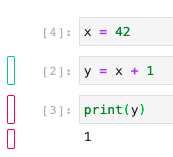

Try hovering over the red highlight. Red highlights indicate cells that are potentially unsafe to execute, because they contain *stale* variables
(i.e., variables for which there exists a more up-to-date dependency). The linked cyan-colored refresher highlight should fill -- this indicates the cell
that should be run to resolve staleness:

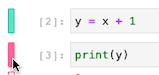

NBSafety infers variable dependencies automatically.
To see `y`'s dependencies, run the following cell with the `%safety` line magic:

In [ ]:
%safety show_deps y

As we can see, `y` depends on `x`, but a more up-to-date version of `x` exists that was defined in cell 4.
This is why the line magic shows that `y` has is `defined 2; required 4` -- it needs a timestamp of at least
4 to not be stale, but its latest definition was cell 2.
When we re-execute cell 3 (the `print(y)` cell), we might expect to see `43`, but we will see `1` instead.
NBSafety will provide a warning the first time we execute cell 3, in case it was an accidental
submission, and then go through with execution the second time we try to execute it.
Go ahead and re-execute cell 3 (`print(y)`) so that NBSafety prints a warning.
You should see something like the following:

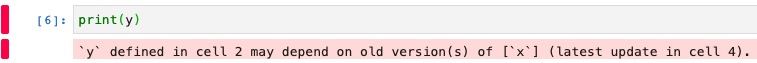

If we next rerun cell 2 (`y = x + 1`), its highlight disappears, and the stale red-colored highlight
associated with the `print(y)` cell turns to a fresh highlight (also cyan-colored),
indicating that this cell has a live reference to an updated variable (y, in this case).
Note also that the output, which is still stale, retains its stale red-colored highlight:

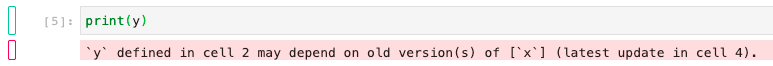

Go ahead and rerun this cell to bring the output in sync with variable `y`.
The highlights will all disappear, and the correct, non-stale output will be
displayed.